In [1]:
import tensorflow as tf 

2025-01-27 13:44:01.899652: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 13:44:01.916904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737985441.936616   24321 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737985441.942591   24321 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 13:44:01.961913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
#!/bin/bash
#!curl -L -o ./brain-tumor-mri-dataset.zip\
#  https://www.kaggle.com/api/v1/datasets/download/masoudnickparvar/brain-tumor-mri-dataset

In [3]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt

In [4]:
#cd ml_capstone2/

In [5]:
#EDA

In [6]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

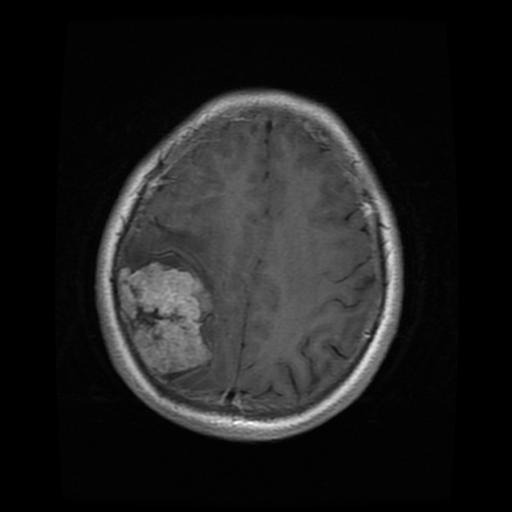

In [7]:
load_img("./dataset/Training/meningioma/Tr-me_0010.jpg")

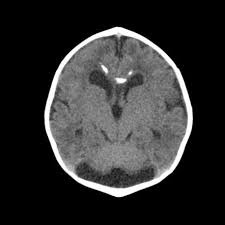

In [8]:
load_img("./dataset/Training/notumor/Tr-no_0010.jpg")

In [9]:
#train a model 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

In [11]:
def make_model_large(input_size,learning_rate, inner_size,drop_rate):
    base_model1=EfficientNetB0(weights="imagenet",
                    include_top=False,
                    input_shape=(input_size,input_size,3)
                   )
    base_model1.trainable=False
    inputs1 =keras.Input(shape=(input_size,input_size,3))
    base1 =base_model1(inputs1,training=False)
    pooling=keras.layers.GlobalAvgPool2D()
    vectors1=pooling(base1)
    
    inner1 =keras.layers.Dense(inner_size,activation='relu')(vectors1) # inner layers # activation function relu for inner layers 
    drop1 =keras.layers.Dropout(drop_rate)(inner1)
    outputs1=keras.layers.Dense(4)(drop1) # ,activation='softmax'
    model1=keras.Model(inputs1,outputs1)
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)# optimize the wieghts of the dense layers 
    #meseuring the accuracy for the optimizer 
    loss= keras.losses.CategoricalCrossentropy(from_logits=True) #MSE for regression models (logist true makes it more stable)
    # in case of logists False you must add actimation fuction to the output1 layers activation='softmax'

    model1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model1

In [12]:
#adding checkpoints 

In [13]:
checkpoint=keras.callbacks.ModelCheckpoint(
    'MRI_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor ='val_accuracy',
    mode='max'
)

In [ ]:
#CNN model with learning rate tuning 

In [45]:
learning_rate_g = [0.001, 0.01, 0.1]
drop_rate=0.0
input_size=100
# Build image generator for training (takes preprocessing input function)
train_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
train_ds1 = train_gen1.flow_from_directory(directory='./dataset/Training/', # Train images directory
                                         target_size=(input_size,input_size), # resize images to train faster
                                         batch_size=32) # 32 images per batch
val_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
val_ds1 = val_gen1.flow_from_directory(directory='./dataset/Testing/', # Train images directory
                                         target_size=(input_size,input_size), # resize images to train faster
                                         batch_size=32) # 32 images per batch
hist=[]
for learning_rate in learning_rate_g:
    model3 = make_model_large(input_size=input_size,learning_rate=learning_rate,inner_size=5,drop_rate=drop_rate)
    history = model3.fit(
    train_ds1,
    epochs=10,
    validation_data=val_ds1,
    callbacks=[checkpoint]
    )
    hist.append((learning_rate, history)) 

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.6244 - loss: 1.0014 - val_accuracy: 0.7956 - val_loss: 0.5710
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0.8423 - loss: 0.4579 - val_accuracy: 0.8238 - val_loss: 0.4624
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.8693 - loss: 0.3628 - val_accuracy: 0.8314 - val_loss: 0.4147
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.8897 - loss: 0.3172 - val_accuracy: 0.8474 - val_loss: 0.3740
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.9018 - loss: 0.2742 - val_accuracy: 0.8688 - val_loss: 0.3338
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.9057 - loss: 0.2684 - val_accuracy: 0.8780 - val_loss: 0.3190
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.9188 - loss: 0.2349 - val_accuracy: 0.8879 - val_loss: 0.3155

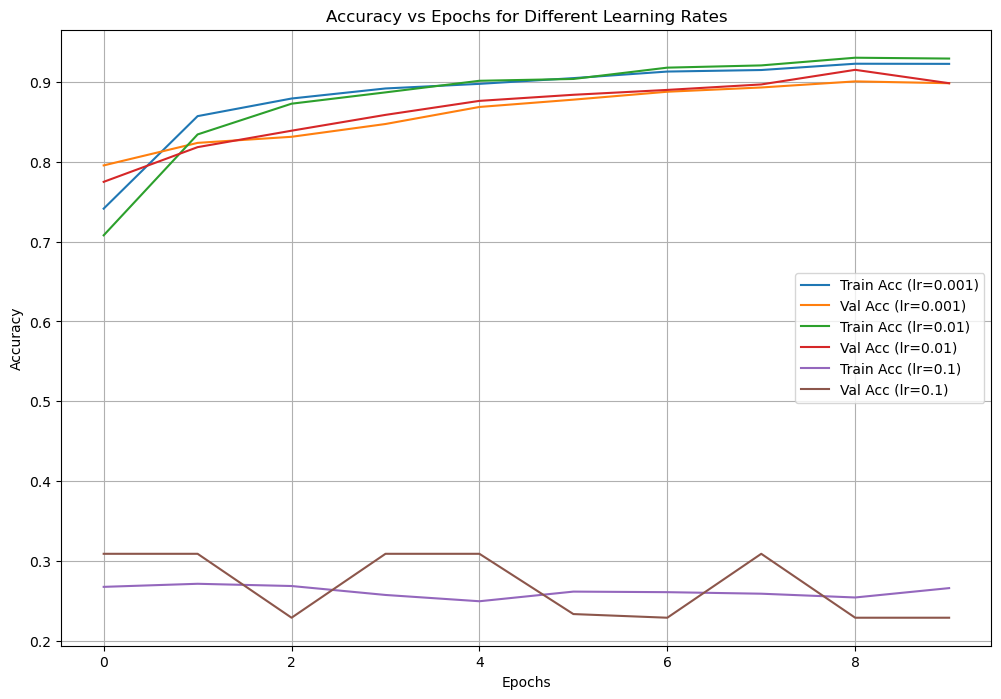

In [46]:

# Plot the accuracy for different learning rates
plt.figure(figsize=(12, 8))
for learning_rate, history in hist:
    plt.plot(history.history['accuracy'], label=f'Train Acc (lr={learning_rate})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={learning_rate})')

# Add plot details
plt.title("Accuracy vs Epochs for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#CNN model with dropout tuning 

In [50]:
learning_rate_g =  0.01
drop_rate_g =[0, 0.2, 0.4]
input_size=100
# Build image generator for training (takes preprocessing input function)
train_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
train_ds1 = train_gen1.flow_from_directory(directory='./dataset/Training/', # Train images directory
                                           target_size=(input_size,input_size), # resize images to train faster
                                           batch_size=32) # 32 images per batch
val_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
val_ds1 = val_gen1.flow_from_directory(directory='./dataset/Testing/', # Train images directory
                                         target_size=(input_size,input_size), # resize images to train faster
                                         batch_size=32) # 32 images per batch
hist_drop_rate=[]
for drop_rate in drop_rate_g:
    model3 = make_model_large(input_size=input_size,learning_rate=learning_rate,inner_size=5,drop_rate=drop_rate)
    history = model3.fit(
    train_ds1,
    epochs=10,
    validation_data=val_ds1,
    callbacks=[checkpoint]
    )
    hist_drop_rate.append((drop_rate, history)) 

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 161ms/step - accuracy: 0.5975 - loss: 0.9545 - val_accuracy: 0.7239 - val_loss: 0.6567
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.7514 - loss: 0.5613 - val_accuracy: 0.7887 - val_loss: 0.5101
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.7818 - loss: 0.4815 - val_accuracy: 0.8063 - val_loss: 0.4622
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 148ms/step - accuracy: 0.8004 - loss: 0.4422 - val_accuracy: 0.7979 - val_loss: 0.4903
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.8161 - loss: 0.4279 - val_accuracy: 0.8093 - val_loss: 0.4503
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.8402 - loss: 0.4007 - val_accuracy: 0.8253 - val_loss: 0.4004
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.8637 - loss: 0.3476 - val_accuracy: 0.8185 - val_loss: 0.4722

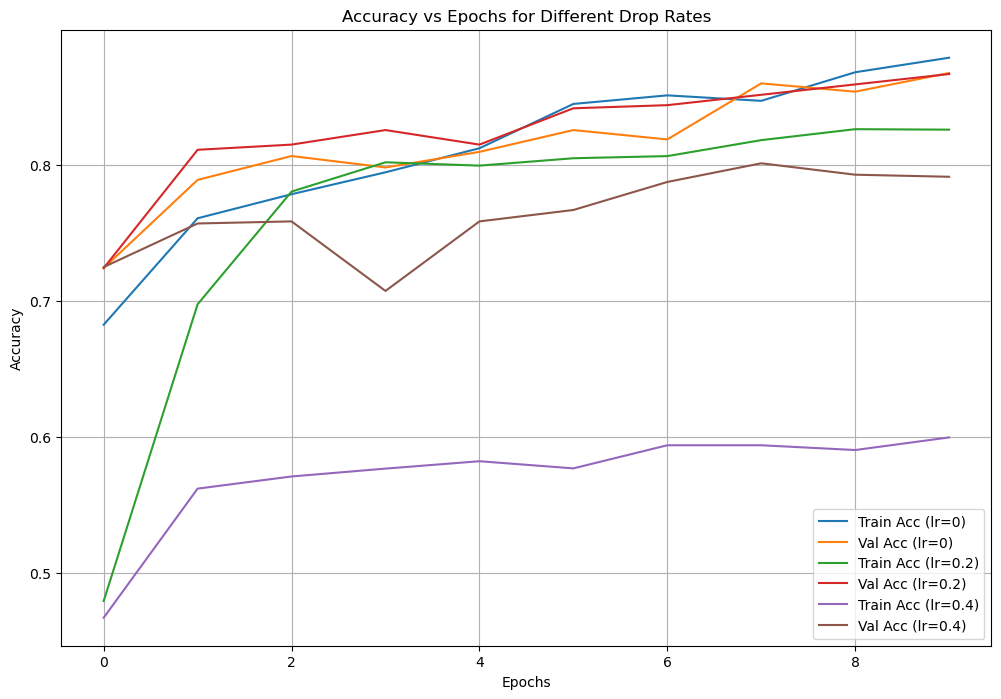

In [52]:

# Plot the accuracy for different drop rates
plt.figure(figsize=(12, 8))
for drop, history in hist_drop_rate:
    plt.plot(history.history['accuracy'], label=f'Train Acc (lr={drop})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={drop})')

# Add plot details
plt.title("Accuracy vs Epochs for Different Drop Rates")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#CNN model with inner_layer size tuning

In [16]:
learning_rate =  0.01
drop_rate=0.2
input_size=100
# Build image generator for training (takes preprocessing input function)
train_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
train_ds1 = train_gen1.flow_from_directory(directory='./dataset/Training/', # Train images directory
                                           target_size=(input_size,input_size), # resize images to train faster
                                           batch_size=32) # 32 images per batch
val_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
val_ds1 = val_gen1.flow_from_directory(directory='./dataset/Testing/', # Train images directory
                                         target_size=(input_size,input_size), # resize images to train faster
                                         batch_size=32) # 32 images per batch
hist_inner_size=[]
for inner_size in [1,5,10]:
    model3 = make_model_large(input_size=input_size,learning_rate=learning_rate,inner_size=inner_size,drop_rate=drop_rate)
    history = model3.fit(
    train_ds1,
    epochs=10,
    validation_data=val_ds1,
    #callbacks=[checkpoint]
    )
    hist_inner_size.append((inner_size, history)) 

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 161ms/step - accuracy: 0.3828 - loss: 1.2094 - val_accuracy: 0.5278 - val_loss: 1.0164
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 148ms/step - accuracy: 0.4696 - loss: 1.0604 - val_accuracy: 0.5355 - val_loss: 1.0057
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.4953 - loss: 1.0294 - val_accuracy: 0.5652 - val_loss: 0.9363
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.5082 - loss: 1.0234 - val_accuracy: 0.5805 - val_loss: 0.9182
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 149ms/step - accuracy: 0.5015 - loss: 1.0241 - val_accuracy: 0.5667 - val_loss: 0.9207
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.5166 - loss: 1.0071 - val_accuracy: 0.5721 - val_loss: 0.9172
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.5118 - loss: 1.0044 - val_accuracy: 0.5889 - val_loss: 0.9108

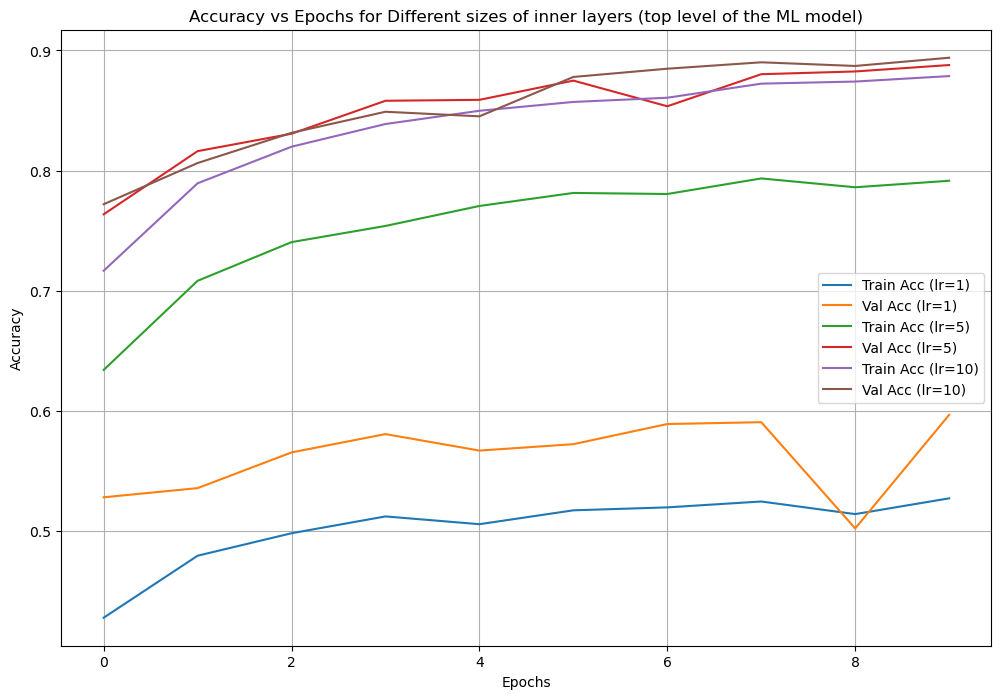

In [17]:
# Plot the accuracy for different inner layer sizes 
plt.figure(figsize=(12, 8))
for size, history in hist_inner_size:
    plt.plot(history.history['accuracy'], label=f'Train Acc (lr={size})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={size})')

# Add plot details
plt.title("Accuracy vs Epochs for Different sizes of inner layers (top level of the ML model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#Train final model 

In [18]:
learning_rate =  0.01
drop_rate=0.2
input_size=400
# Build image generator for training (takes preprocessing input function)
train_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
train_ds1 = train_gen1.flow_from_directory(directory='./dataset/Training/', # Train images directory
                                           target_size=(input_size,input_size), # resize images to train faster
                                           batch_size=32) # 32 images per batch
val_gen1 = ImageDataGenerator(preprocessing_function=preprocess_input)
# Load the train dataset into the train generator
val_ds1 = val_gen1.flow_from_directory(directory='./dataset/Testing/', # Train images directory
                                         target_size=(input_size,input_size), # resize images to train faster
                                         batch_size=32) # 32 images per batch
inner_size = 16
model3 = make_model_large(input_size=input_size,learning_rate=learning_rate,inner_size=inner_size,drop_rate=drop_rate)
history = model3.fit(
    train_ds1,
    epochs=10,
    validation_data=val_ds1,
    callbacks=[checkpoint]
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.6985 - loss: 0.7040 - val_accuracy: 0.8429 - val_loss: 0.4126
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8501 - loss: 0.3560 - val_accuracy: 0.8703 - val_loss: 0.2899
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.8838 - loss: 0.2898 - val_accuracy: 0.8696 - val_loss: 0.2925
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8795 - loss: 0.3037 - val_accuracy: 0.8924 - val_loss: 0.2554
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8959 - loss: 0.2472 - val_accuracy: 0.9169 - val_loss: 0.1944
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9013 - loss: 0.2416 - val_accuracy: 0.9016 - val_loss: 0.2260
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9036 - loss: 0.2332 - val_accuracy: 0.9100 - val_loss: 0.2030
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9047 - loss: 0.2202 - val_accuracy: 0.898

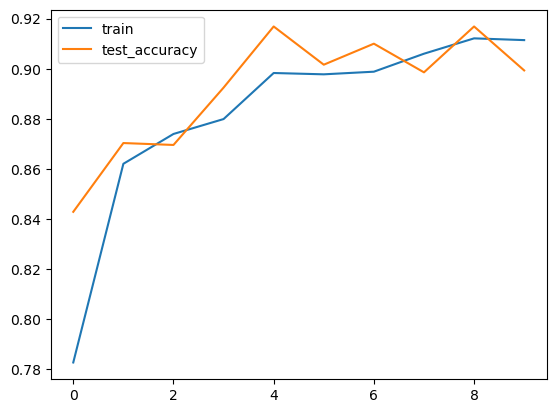

In [19]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.legend()

## CNN model with inner_layer size tuning 